# Analyse exploratoire des données (EDA)

In [2]:
import pandas as pd

# Charger le dataset
df = pd.read_csv("DataSet_Emails.csv")

# Types de chaque colonne
print(df.dtypes)

# Dimensions du dataset
print("Dimensions du dataset :", df.shape)

# Aperçu des premières lignes
print(df.head())


Unnamed: 0     int64
message_id     int64
text          object
label          int64
label_text    object
subject       object
message       object
date          object
dtype: object
Dimensions du dataset : (31716, 8)
   Unnamed: 0  message_id                                               text  \
0           0       33214  any software just for 15 $ - 99 $ understandin...   
1           1       11929  perspective on ferc regulatory action client c...   
2           2       19784  wanted to try ci 4 lis but thought it was way ...   
3           3        2209  enron / hpl actuals for december 11 , 2000 tec...   
4           4       15880  looking for cheap high - quality software ? ro...   

   label label_text                                            subject  \
0      1       spam                  any software just for 15 $ - 99 $   
1      0        ham  perspective on ferc regulatory action client c...   
2      1       spam  wanted to try ci 4 lis but thought it was way ...   
3     

In [3]:
# Vérifier les valeurs manquantes
print(df.isnull().sum())

# Supprimer les lignes avec texte vide ou manquant
df = df.dropna(subset=["text"])

# Supprimer les doublons
df = df.drop_duplicates()

print("Forme après nettoyage :", df.shape)


Unnamed: 0      0
message_id      0
text           51
label           0
label_text      0
subject       274
message       345
date            0
dtype: int64
Forme après nettoyage : (31665, 8)


In [4]:
# Compter le nombre de spam et ham
print(df['label'].value_counts())


label
1    16112
0    15553
Name: count, dtype: int64


C:\Users\Saad\AppData\Local\Temp\ipykernel_9888\93155206.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label_text', palette='viridis')


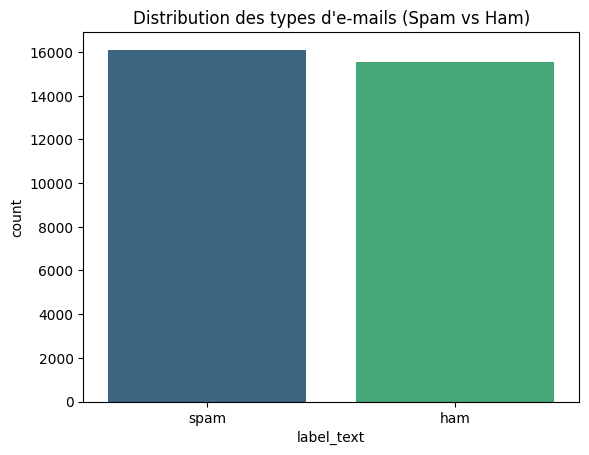

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Afficher un graphique en barres
sns.countplot(data=df, x='label_text', palette='viridis')
plt.title("Distribution des types d'e-mails (Spam vs Ham)")
plt.show()

# Prétraitement du texte

In [6]:
print(df['label'].unique())
print(df['label'].value_counts())

[1 0]
label
1    16112
0    15553
Name: count, dtype: int64


# Afficher les premiers exemples de messages spam et ham (non spam) dans un DataFrame

In [ ]:
# Afficher les 5 premiers exemples de spam et ham
print(df[df['label'] == 'spam']['text'].head())

print(df[df['label'] == 'ham']['text'].head())

Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)


In [8]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')

# Définir le prétraitement
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    # Minuscules
    text = text.lower()
    # Supprimer ponctuation
    text = re.sub(f"[{string.punctuation}]", "", text)
    # Tokenisation
    tokens = word_tokenize(text)
    # Stopwords + stemming
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Appliquer le prétraitement
df['clean_text'] = df['text'].apply(preprocess_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Saad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Saad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


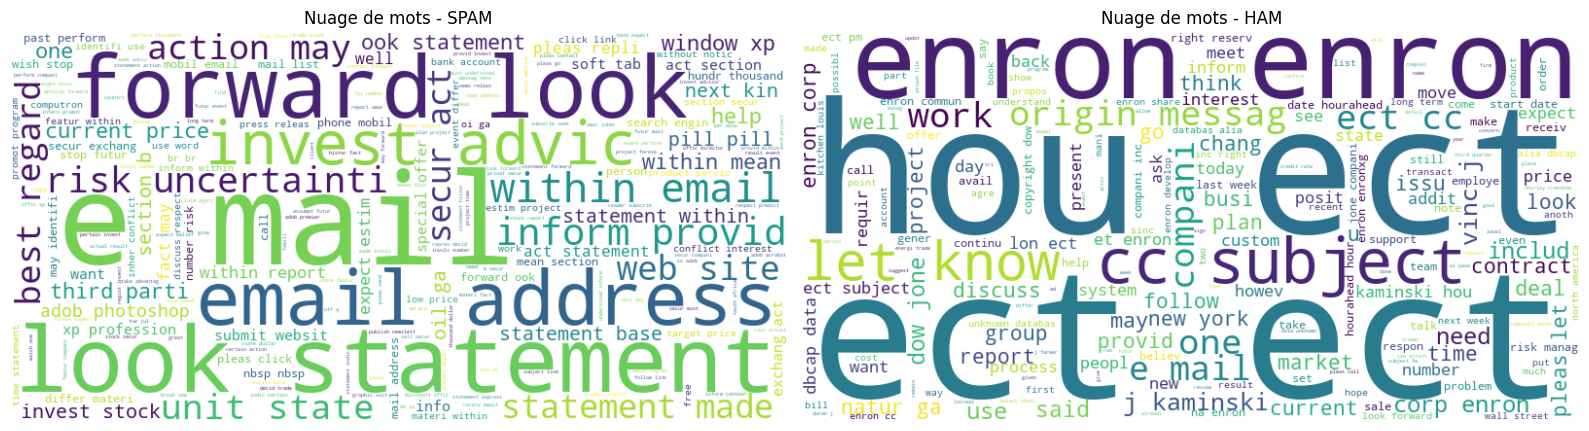

In [9]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filtrer les e-mails spam et ham
spam_words = ' '.join(df[df.label_text == 'spam']['clean_text'])
ham_words = ' '.join(df[df.label_text == 'ham']['clean_text'])
# Créer les WordClouds
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_words)
plt.figure(figsize=(16, 8))

# Nuage de mots pour les spams
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Nuage de mots - SPAM')
plt.axis('off')

# Nuage de mots pour les hams
plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Nuage de mots - HAM')
plt.axis('off')

plt.tight_layout()
plt.show()

# Extraction des caractéristiques

In [ ]:
#Convertir le texte nettoyé (clean_text) en vecteurs numériques exploitables par un modèle de machine learning,
# à l’aide de la technique TF-IDF, puis stocker les étiquettes (spam ou ham) dans y.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorisation
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])

# Labels
y = df['label']


In [23]:
#Diviser les données en jeu d'entraînement et jeu de test, pour entraîner et évaluer un modèle de machine learning.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Entraîner trois modèles de classification différents pour détecter les spams à partir des emails vectorisés en TF-IDF.

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

# Initialiser les modèles
nb = MultinomialNB()
dt = DecisionTreeClassifier()
svm = LinearSVC(random_state=42)

# Entraîner
nb.fit(X_train, y_train)
dt.fit(X_train, y_train)
svm.fit(X_train, y_train)


,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,42


In [ ]:
# Évaluer la performance des modèles Naive Bayes, Arbre de Décision et SVM sur le jeu de test, à l’aide :

#de la matrice de confusion

#et du rapport de classification (précision, rappel, f1-score, etc.)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluate(model, name):
    print(f"--- {name} ---")
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

evaluate(nb, "Naive Bayes")
evaluate(dt, "Decision Tree")
evaluate(svm, "SVM")


--- Naive Bayes ---
[[3070   50]
 [  47 3166]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3120
           1       0.98      0.99      0.98      3213

    accuracy                           0.98      6333
   macro avg       0.98      0.98      0.98      6333
weighted avg       0.98      0.98      0.98      6333

--- Decision Tree ---
[[2997  123]
 [  95 3118]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      3120
           1       0.96      0.97      0.97      3213

    accuracy                           0.97      6333
   macro avg       0.97      0.97      0.97      6333
weighted avg       0.97      0.97      0.97      6333

--- SVM ---
[[3071   49]
 [   9 3204]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3120
           1       0.98      1.00      0.99      3213

    accuracy                           0.99    

In [24]:
# Évaluer les performances générales du modèle Naive Bayes avec une validation croisée à 5 plis (5-fold cross-validation).

In [15]:
from sklearn.model_selection import cross_val_score

# Validation croisée pour chaque modèle
print("Naive Bayes CV:", cross_val_score(nb, X, y, cv=5).mean())

Naive Bayes CV: 0.985851886941418


In [25]:
# Évaluer les performances globales du modèle d’Arbre de Décision (DecisionTreeClassifier)
#  en utilisant une validation croisée à 5 plis (cv=5).

In [16]:
print("Decision Tree CV:", cross_val_score(dt, X, y, cv=5).mean())

Decision Tree CV: 0.9624190746881414


In [26]:
# Évaluer la performance moyenne du modèle SVM linéaire (LinearSVC) avec une validation croisée à 5 plis.

In [17]:
print("SVM CV:", cross_val_score(svm, X, y, cv=5).mean())

SVM CV: 0.9911574293383861


In [ ]:
# Trouver automatiquement la meilleure valeur du paramètre C pour un classifieur SVM linéaire (LinearSVC), 
# à l’aide de la recherche par grille (Grid Search) et validation croisée.

In [21]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10]
}
grid = GridSearchCV(LinearSVC(), param_grid, cv=3)
grid.fit(X_train, y_train)

print("Meilleurs paramètres :", grid.best_params_)

Meilleurs paramètres : {'C': 1}


In [27]:
# Sauvegarder le modèle entraîné (ici le meilleur modèle trouvé par la recherche de grille GridSearchCV) 
# dans un fichier pour pouvoir le réutiliser plus tard sans avoir à le réentraîner.

In [22]:
import joblib

# Sauvegarder le modèle
joblib.dump(grid.best_estimator_, "best_model.pkl")

['best_model.pkl']

In [28]:
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']